In [2]:
%load_ext autoreload
%autoreload 2

In [255]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

In [256]:
import xylo
import xylo.types as t
import xylo.cut
import xylo.slicer as s
import xylo.database
import xylo.sweep as xs
import xylo.audio as xaudio

In [532]:
note = 57

In [533]:
db = xylo.database.get()
bar = db.get_bar(note)
best = db.get_best(note)
spline = jnp.array(best['coeff'])
with open(f"data/gcode/{note}.json", 'w') as f:
  json.dump(best, f)

In [534]:
# spline = [0.8618183457492242, 0.10249491254184383, 0.6796106365369823, 0.6894492655492203, 0.3909279734013816, 0.7317539174703496]
# spline = jnp.array([ 0.81393585, -0.00699588,  0.63882503,  0.65606331,  0.37536516, 0.79187227])
# spline = jnp.array([0.5, 0.3, 0.5, 1.0])

# sections = xylo.cut.spline(bar, spline)
sections = [xylo.cut.spline(bar, xylo.cut.spline_scale(spline, i)) for i in jnp.arange(0.2, 1.01, 0.2)]
# sections2 = xylo.cut.spline(bar, xylo.cut.spline_scale(spline, 0.5))

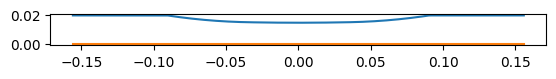

In [535]:
sections[-1].plot()

In [536]:
prev = None
i = 1
for ss in sections:
  o = s.slicer8.outline(bar, ss)
  s.slicer8.path_topdown(bar, o, prev, cut_width = 4).write(f'data/gcode/topdown-{note}-{i}.ngc')
  prev = o
  i = i + 1

s.slicer8.path_topdown(bar, s.slicer8.outline(bar, sections[-1]), None, cut_width = 4).write(f'data/gcode/topdown-{note}-full.ngc')

In [537]:
wood = db.get_wood(note, coeffs = [1.0, 1.0, 1.0])
print(wood)
for ss in sections:
    swp = xs.sweep(wood, bar, ss, t.sweep_default)
    print(i, swp.harmonics, swp.harmonics / swp.harmonics[0])

Wood(rho=1002.8566353890305, E=24100000000.0, G=1606666666.6666667, nu=6.5)
6 [ 914.13367057 2382.30801497 4276.60729796] [1.         2.60608278 4.67831723]
6 [ 859.08785499 2317.49555307 4266.18653611] [1.         2.69762346 4.96594907]
6 [ 805.43496499 2249.96067527 4253.38454213] [1.         2.79347281 5.28085411]
6 [ 752.9563124  2179.32308203 4236.97241647] [1.         2.89435528 5.62711587]
6 [ 701.45406273 2105.12384373 4215.45418039] [1.         3.00108582 6.00959408]


[ 701.6 2086.8] [0.99995544 2.97421182]
{'peak_heights': array([0.08127019, 0.08807143]), 'prominences': array([0.08126685, 0.08807062]), 'left_bases': array([10, 10]), 'right_bases': array([ 5655, 35822])}


/Users/amos/proj/xylo/xgit/py/xylo/audio.py:44: RuntimeWarning: invalid value encountered in cast
  i32 = fs.astype('int32')


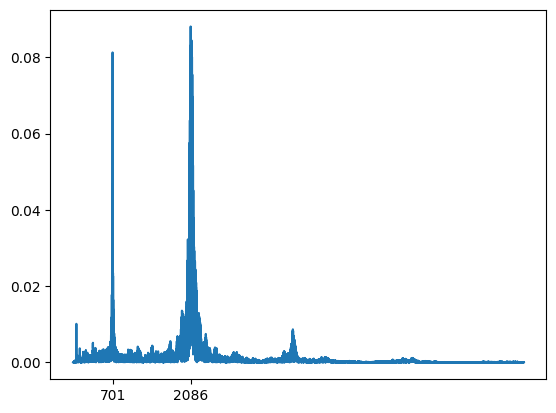

In [542]:
import xylo.tuning


vs = xaudio.read_samples(5.0)
xaudio.plot_spectrum(vs, height = 0.02, distance = 1000, prominence = 0.02, comparison_freq = xylo.tuning.yamaha_YX500R.note_to_freq(note))
xaudio.write_wave(f'tb-{note}', vs)

[  60.2  399.8  644.2  854.4 1071.  1377.6 1628.6 1853.6 2156.8 2429.
 2813.6 3055.  3257.  4429.6] [0.07214896 0.47915537 0.77206575 1.02398786 1.28358029 1.6510366
 1.95185701 2.22151673 2.58489819 2.91112653 3.37206489 3.66137981
 3.90347432 5.30882095]
{'peak_heights': array([0.01124774, 0.0046814 , 0.00366831, 0.15200122, 0.00736023,
       0.00768698, 0.00562591, 0.0090621 , 0.01093917, 0.0157636 ,
       0.00673114, 0.00346752, 0.00232695, 0.00448463]), 'prominences': array([0.01124312, 0.00466353, 0.00354831, 0.15199891, 0.00730953,
       0.00765464, 0.00559264, 0.00900942, 0.01086631, 0.01573523,
       0.00664287, 0.00338738, 0.00229977, 0.00448245]), 'left_bases': array([   36,  1308,  2229,    36,  5187,  5187,  8019,  8413,  8413,
        8413, 13376, 14906, 16199, 19078]), 'right_bases': array([ 2229,  2229,  3304, 39581,  5614,  8413,  8413,  9510, 11096,
       39581, 39581, 19078, 19078, 39581])}


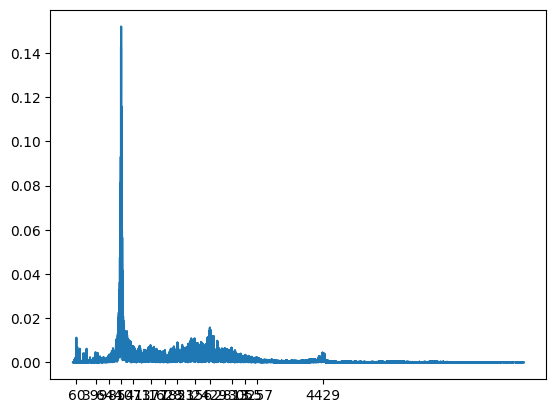

In [500]:
xaudio.plot_spectrum(vs, height = 0.002, distance = 1000, prominence = 0.002, comparison_freq = xylo.tuning.yamaha_YX500R.note_to_freq(note))